# Card Simulation

This code implements a 52-card standard deck *without replacement* in one trial but *with replacement* between trials. Each trial is set up to draw 5 cards by default.

![card draw](https://steamuserimages-a.akamaihd.net/ugc/930435128471083772/1A94E5C04A8400D7599CFD13B7683054742A63FC/?imw=5000&imh=5000&ima=fit&impolicy=Letterbox&imcolor=%23000000&letterbox=false)

## How do I run this simulation?

There is a play button in the top tool bar. A keyboard shortcut for play is "Shift-Enter". You can use this play button or shift-enter to walk through each "cell" step-by-step and see the results.

If you need to re-run a cell because you have altered it, make sure to re-run from the earliest cell you have edited. Changes are not saved until the cell you changed is "run".

There is also a fast forward button that will run all of the cells by reseting the "run-time order" of the code. Use this fast forward button if the simulation is giving you a lot of errors.

In [1]:
# do not delete these statements
# make sure to run this cell first if your code is not working below
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(data, xlabel='', ylabel='', title=''):
    """
    Plot a histogram of the given data using pandas.

    Parameters:
    - data (list or pandas Series): Data to be plotted.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    - title (str): Title for the plot.
    """
    # Convert data to pandas Series if it's not already
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    
    # Check if data is numeric or categorical
    if pd.api.types.is_numeric_dtype(data):
        # If numeric, plot a histogram with discrete bins
        plt.figure(figsize=(8, 6))
        data.plot(kind='hist', bins=range(int(min(data)), int(max(data))+2), color='skyblue', edgecolor='black', alpha=0.7, align='mid')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        # If categorical, plot a bar plot
        plt.figure(figsize=(8, 6))
        data.value_counts().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

Description of the Function:

```python
draw_cards(int draws, int trials) --> list of lists
```

- draws is a positive integers representing the number of cards drawn in the simulated experiement (eg. draws = 5 is 5 cards drawn from one deck at a time)
- trials is a positive integers representing the number of trials in the simulated experiement (eg. trials = 10 is 10 5-card-draws, each from a "fresh" 52 card deck)
- This function outputs a list of all the simulated outcomes (eg. draw_cards(5, 3) could produce [['J♡', 'J♢', '3♡', 'Q♣', '9♡'], ['A♣', '6♢', '10♢', '5♠', '7♠'], ['Q♣', '6♣', '8♢', 'J♡', 'A♢']] as a list of list of outcomes for 3 trials)

In [2]:
def draw_cards(draws, trials):
    suits = ['♠', '♡', '♢', '♣']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    deck = [value + suit for suit in suits for value in values]

    # If num_cards exceeds the total number of cards in the deck, return a shuffled deck
    if draws > len(deck):
        random.shuffle(deck)
        return deck

    # Draw cards from the deck without replacement
    drawn_cards = []
    for t in range(trials):
        drawn_cards.append(random.sample(deck, draws))
    return drawn_cards

In [3]:
draws = 5
trials = 25
outcomes = draw_cards(draws, trials)
print("Each list is one Outcome of a trial:")
print(outcomes, '\n')
print("Each row is one Outcome of a trial:")
for outcome in outcomes:
    for card in outcome:
        print(f'{card} ', end='')
    print("")

Each list is one Outcome of a trial:
[['Q♢', 'J♡', '8♣', 'Q♣', '8♢'], ['2♠', '5♢', '8♠', '2♡', '10♣'], ['3♢', '6♡', '10♠', 'K♢', '9♢'], ['9♠', '10♢', 'A♣', '2♢', '2♡'], ['K♢', '3♢', '9♡', 'A♣', '8♠'], ['10♡', '5♢', '7♠', '5♣', '2♣'], ['4♠', '8♡', '8♢', '10♣', 'J♡'], ['2♠', 'K♠', '10♠', '8♢', '7♣'], ['7♣', '6♠', 'A♢', '7♢', 'J♡'], ['A♢', 'K♡', 'J♠', '7♡', '4♣'], ['9♢', '6♣', '4♢', 'Q♢', '9♣'], ['7♢', '4♢', '8♣', '2♣', 'Q♢'], ['10♠', 'J♡', '3♠', 'Q♠', '3♢'], ['A♢', 'A♣', '4♡', '8♡', '3♣'], ['10♠', '10♣', '2♢', '8♠', 'Q♢'], ['A♡', '8♠', '8♢', '4♡', '4♣'], ['6♡', '5♡', '2♡', '3♠', '10♠'], ['5♢', 'J♣', '9♠', '3♠', 'A♠'], ['9♣', '7♠', '5♡', '9♡', 'Q♣'], ['10♢', '4♠', '8♢', 'J♡', 'A♡'], ['9♠', 'K♡', '6♡', '6♠', '7♡'], ['7♣', '3♠', '9♡', '10♠', '7♠'], ['Q♠', '4♣', '8♣', 'A♣', '8♠'], ['7♡', 'J♢', '6♠', '3♣', '4♠'], ['J♢', '7♠', '2♠', 'A♠', '9♠']] 

Each row is one Outcome of a trial:
Q♢ J♡ 8♣ Q♣ 8♢ 
2♠ 5♢ 8♠ 2♡ 10♣ 
3♢ 6♡ 10♠ K♢ 9♢ 
9♠ 10♢ A♣ 2♢ 2♡ 
K♢ 3♢ 9♡ A♣ 8♠ 
10♡ 5♢ 7♠ 5♣ 2♣ 
4♠ 8♡ 8♢ 10♣

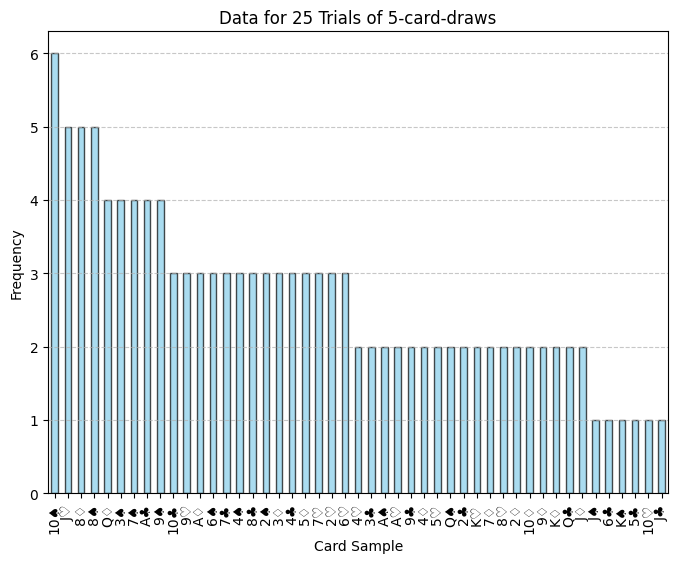

In [4]:
dataset = [card for outcome in outcomes for card in outcome] 
plot_histogram(dataset, xlabel='Card Sample', ylabel='Frequency', title=f'Data for {trials} Trials of {draws}-card-draws')